## Hermitian Fermi Hubbard 2 site
t = 2 U = 1

In [1]:
from qiskit import QuantumCircuit
import scipy.linalg as la
import numpy as np
from qiskit.primitives import Estimator
from qiskit.quantum_info import Operator, SparsePauliOp
from scipy.optimize import minimize
from qiskit.circuit.library import TwoLocal

H = SparsePauliOp(['IIII', 'IIIZ', 'IIXX', 'IIYY', 'IIZI', 'IZII', 'IZIZ', 'XXII', 'YYII', 'ZIII', 'ZIZI'],
              [ 0.5 +0.j, -0.25+0.j, -1.  +0.j, -1.  +0.j, -0.25+0.j, -0.25+0.j,
  0.25+0.j, -1.  +0.j, -1.  +0.j, -0.25+0.j,  0.25+0.j]) 

def VQA_1st_Step(theta, Er):

  qc = ansatz.assign_parameters(theta)
  H_minusE = H + SparsePauliOp([H.num_qubits*'I'],[-Er])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def VQA_2nd_Step(theta):
    
  ## theta contains Er as first element
  Er = theta[0]
  qc = ansatz.assign_parameters(theta[1:])
  H_minusE = H + SparsePauliOp([H.num_qubits*'I'],[-Er])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def get_energy(Er0):
    
    x0 = np.random.random( len(ansatz.parameters) )

    result1 = minimize(lambda theta: VQA_1st_Step(theta,Er0), x0 = x0, method="BFGS") 

    x1 = np.concatenate(([Er0], result1.x))

    result2 = minimize(VQA_2nd_Step, x0 = x1, method="BFGS") 

    return [ result2.x[0], result2.fun ]

ansatz = TwoLocal(H.num_qubits, ['ry', 'rz'], 'cz',reps=3)
get_energy(0.5)

[np.float64(2.5288813108908965e-05), np.float64(2.9812150664776382e-09)]

In [20]:
E0 = -4.0
Eset = []
while (E0 < 4.7):
    
    value = get_energy(E0)
    print(value)
    if value[1] < 1.0e-08:
        Eset.append(value[0])
    E0 += 0.5

[np.float64(-3.5311288573388415), np.float64(3.4924991010321094e-08)]
[np.float64(-3.531126065109869), np.float64(1.6134894809116673e-10)]
[np.float64(-3.531128772515955), np.float64(2.050372183148852e-08)]
[np.float64(-2.0000000056063407), np.float64(1.1211170880542909e-11)]
[np.float64(-2.0), np.float64(5.975175909611607e-11)]
[np.float64(-1.9999998160271162), np.float64(5.118502843792783e-12)]
[np.float64(-1.0), np.float64(3.9759251446724875e-11)]
[np.float64(8.712889802836435e-05), np.float64(7.347275565727784e-12)]
[np.float64(0.0), np.float64(1.634067881006729e-11)]
[np.float64(6.026523724500521e-11), np.float64(9.291925562315839e-11)]
[np.float64(1.0), np.float64(5.767119698463219e-10)]
[np.float64(1.9999971605403464), np.float64(1.1288339707427042e-10)]
[np.float64(2.0), np.float64(8.418399310983204e-11)]
[np.float64(1.9999996941952722), np.float64(6.744910185929598e-12)]
[np.float64(3.0), np.float64(2.986583202968518e-11)]
[np.float64(2.9999999998316245), np.float64(5.91471316

In [21]:
Eset

[np.float64(-3.531126065109869),
 np.float64(-2.0000000056063407),
 np.float64(-2.0),
 np.float64(-1.9999998160271162),
 np.float64(-1.0),
 np.float64(8.712889802836435e-05),
 np.float64(0.0),
 np.float64(6.026523724500521e-11),
 np.float64(1.0),
 np.float64(1.9999971605403464),
 np.float64(2.0),
 np.float64(1.9999996941952722),
 np.float64(3.0),
 np.float64(2.9999999998316245),
 np.float64(4.531128862958368),
 np.float64(4.531126144480103)]

array([-3.53112887e+00, -2.00000000e+00, -2.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -2.22272305e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        2.00000000e+00,  3.00000000e+00,  3.00000000e+00,  4.53112887e+00])

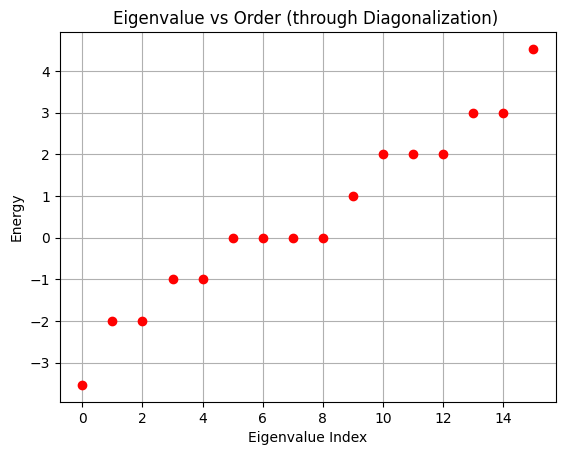

In [22]:
import matplotlib.pyplot as plt

energies = la.eig(H)[0].real
eng = np.sort(energies)
plt.xlabel("Eigenvalue Index")
plt.ylabel("Energy")
plt.plot(eng,'o',color='red')
plt.title("Eigenvalue vs Order (through Diagonalization) ")
plt.grid()
eng

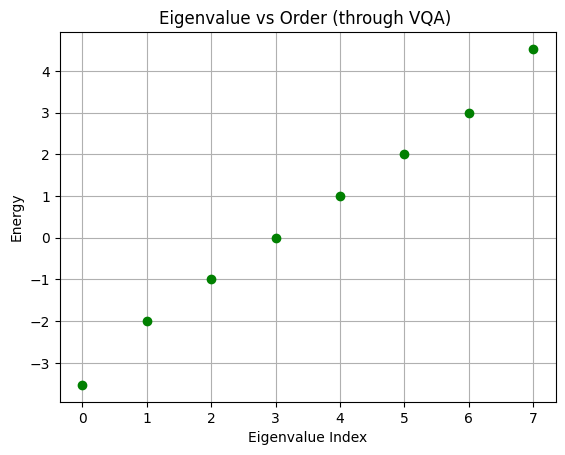

In [25]:
Eset11 = list(set([elem.round(3) for elem in Eset]))
plt.plot(np.sort(Eset11),'o',color='green')
plt.xlabel("Eigenvalue Index")
plt.ylabel("Energy")
plt.title("Eigenvalue vs Order (through VQA) ")
plt.grid()


[np.float64(-0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.5311), np.float64(-1.0), np.float64(-3.5311), np.float64(-2.0)]
[np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.531), np.float64(-1.0), np.float64(-3.531), np.float64(-2.0)]


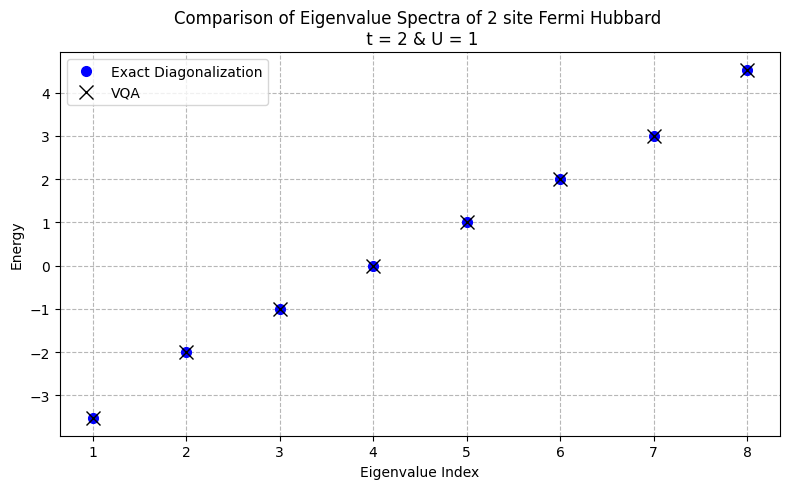

In [28]:
import numpy as np
import matplotlib.pyplot as plt

eng76 = list(set(eng.round(4)))

print(eng76)
print(Eset11)

eigvals_ED = np.sort(eng76)      
eigvals_VQE = np.sort(Eset11) 

plt.figure(figsize=(8,5))
plt.plot(range(1,9), eigvals_ED, 'o', label='Exact Diagonalization', markersize=7,color='blue')
plt.plot(range(1,9), eigvals_VQE, 'x', label='VQA', markersize=10,color='black')
plt.xlabel("Eigenvalue Index")
plt.ylabel("Energy")
plt.title("Comparison of Eigenvalue Spectra of 2 site Fermi Hubbard \n t = 2 & U = 1")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.9)
plt.grid(which="minor")
plt.tight_layout()
plt.show()
